# Visualize Football Stadium Attendance

This notebook visualizes 2015 per-game average attendance for the stadiums geocoded in [foursquare-geocode-football-stadiums.ipynb](foursquare-geocode-football-stadiums.ipynb) and visualized by capacity in [visualize-football-stadiums.ipynb](visualize-football-stadiums.ipynb). This dataset comprises all the Division I FBS college football stadiums in the US.

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.font_manager as fm, matplotlib.cm as cm, matplotlib.patches as mpatches

In [2]:
# load the geocoded stadium capacity data
df_capacity = pd.read_csv('data/stadiums-geocoded.csv')
df_capacity.head()

,stadium,city,state,team,conference,capacity,built,expanded,div,latitude,longitude
0,Michigan Stadium,Ann Arbor,MI,Michigan,Big Ten,107601,1927,2015,fbs,42.265869,-83.748726
1,Beaver Stadium,University Park,PA,Penn State,Big Ten,106572,1960,2001,fbs,40.812153,-77.856202
2,Ohio Stadium,Columbus,OH,Ohio State,Big Ten,104944,1922,2014,fbs,40.001686,-83.019728
3,Kyle Field,College Station,TX,Texas A&M,SEC,102733,1927,2015,fbs,30.610098,-96.340729
4,Neyland Stadium,Knoxville,TN,Tennessee,SEC,102455,1921,2010,fbs,35.954734,-83.925333


In [3]:
# load the 2015 stadium attendance data
df_attend = pd.read_csv('data/attendance-ncaa-2015-fbs.txt', sep=';')
df_attend.head()

,school,games_total_pergame
0,Air Force,"6 156,158 26,026"
1,Akron,"6 108,588 18,098"
2,Alabama,"7 707,786 101,112"
3,Appalachian St.,"6 128,755 21,459"
4,Arizona,"6 308,355 51,393"


In [4]:
# parse the columns out of the stadium attendance data
df_attend['home_games'], df_attend['total_attend'], df_attend['per_game_attend'] = list(zip(*df_attend['games_total_pergame'].str.split().tolist()))
df_attend['home_games'] = df_attend['home_games'].astype(int)
df_attend['total_attend'] = df_attend['total_attend'].str.replace(',', '').astype(int)
df_attend['per_game_attend'] = df_attend['per_game_attend'].str.replace(',', '').astype(int)
df_attend['school'] = df_attend['school'].str.strip('\*')
df_attend = df_attend.drop('games_total_pergame', axis=1)
df_attend.head()

,school,home_games,total_attend,per_game_attend
0,Air Force,6,156158,26026
1,Akron,6,108588,18098
2,Alabama,7,707786,101112
3,Appalachian St.,6,128755,21459
4,Arizona,6,308355,51393


In [5]:
# replace abbreviations to match school/team names in the capacity df
to_replace = {'St\.':'State',
              'Mich\.':'Michigan',
              'Fla\.':'Florida',
              'Ga\.':'Georgia',
              'La\.':'Louisiana',
              'Tenn\.':'Tennessee',
              'Ill\.':'Illinois',
              'Ala\.':'Alabama',
              'Miss\.':'Mississippi',
              'Ky\.':'Kentucky'}

for old, new in to_replace.items():
    df_attend['school'] = df_attend['school'].str.replace(old, new)

In [6]:
# rename a few schools to match team names in the capacity df
to_rename = {'Army West Point':'Army',
             'Massachusetts':'UMass',
             'Miami (FL)':'Miami',
             'North Carolina State':'NC State',
             'Northern Illinois':'NIU',
             'Ole Miss':'Mississippi',
             'South Florida':'USF',
             'Southern Mississippi':'Southern Miss',
             'UConn':'Connecticut'}

for old, new in to_rename.items():
    df_attend.loc[df_attend['school']==old, 'school'] = new

In [7]:
df_attend.head()

,school,home_games,total_attend,per_game_attend
0,Air Force,6,156158,26026
1,Akron,6,108588,18098
2,Alabama,7,707786,101112
3,Appalachian State,6,128755,21459
4,Arizona,6,308355,51393


In [8]:
# merge the stadium attendance and capacity dfs
df = pd.merge(df_attend, df_capacity, left_on='school', right_on='team')

In [9]:
# calculate the percent each stadium filled per game on average
df['pct_fill'] = df['per_game_attend'] / df['capacity']
df['pct_fill_str'] = df['pct_fill'].map(lambda x: '{:.1f}%'.format(x*100))

In [10]:
# show top stadiums by percent filled
df = df.sort_values(by='pct_fill', ascending=False)
df[['school', 'stadium', 'per_game_attend', 'capacity', 'pct_fill_str']].head()

,school,stadium,per_game_attend,capacity,pct_fill_str
80,Oregon,Autzen Stadium,57631,54000,106.7%
43,Kansas State,Bill Snyder Family Football Stadium,53100,50000,106.2%
76,Oklahoma,Gaylord Family Oklahoma Memorial Stadium,85357,82112,104.0%
97,TCU,Amon G. Carter Stadium,46767,45000,103.9%
112,Utah,Rice-Eccles Stadium,46533,45017,103.4%


In [11]:
print(len(df[df['pct_fill']<(2/3)]))
print(len(df[df['pct_fill']<(0.5)]))

39
13


In [12]:
# show top stadiums by capacity
df = df.sort_values(by='capacity', ascending=False)
df[['school', 'stadium', 'per_game_attend', 'capacity', 'pct_fill_str']].head()

,school,stadium,per_game_attend,capacity,pct_fill_str
57,Michigan,Michigan Stadium,110168,107601,102.4%
82,Penn State,Beaver Stadium,99799,106572,93.6%
75,Ohio State,Ohio Stadium,107244,104944,102.2%
101,Texas A&M,Kyle Field,103622,102733,100.9%
99,Tennessee,Neyland Stadium,100584,102455,98.2%


In [13]:
# show top stadiums by attendance
df = df.sort_values(by='per_game_attend', ascending=False)
df[['school', 'stadium', 'per_game_attend', 'capacity', 'pct_fill_str']].head()

,school,stadium,per_game_attend,capacity,pct_fill_str
57,Michigan,Michigan Stadium,110168,107601,102.4%
75,Ohio State,Ohio Stadium,107244,104944,102.2%
101,Texas A&M,Kyle Field,103622,102733,100.9%
50,LSU,Tiger Stadium,102004,102321,99.7%
2,Alabama,Bryant–Denny Stadium,101112,101821,99.3%


## Visualize it

In [14]:
# set the font properties for the charts
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=28, weight='bold', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=22, weight='normal', stretch='normal')
xticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
yticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
legend_size = 20

In [15]:
# index by school name and sort by percent filled
df_plot = df.set_index('school')
df_plot = df_plot.sort_values(by='pct_fill', ascending=False)

In [16]:
# get a list of colors, one for each conference sorted from greatest to lowest mean capacity
confs_by_capacity = df.groupby('conference')['capacity'].mean().sort_values(ascending=True)
confs = np.array([df[df['team']==label].iloc[0]['conference'] for label in df_plot.index])
bins = len(confs_by_capacity)
color_map = cm.get_cmap('spectral')
increments = [x/float(bins) for x in range(bins)]
color_list = color_map(increments).tolist()

In [17]:
# assign one color to each conference, then color each team according to its conference
conf_colors = {}
for conf, color in zip(confs_by_capacity.index, color_list):
    conf_colors[conf] = color
colors = df_plot['conference'].map(lambda x: conf_colors[x])

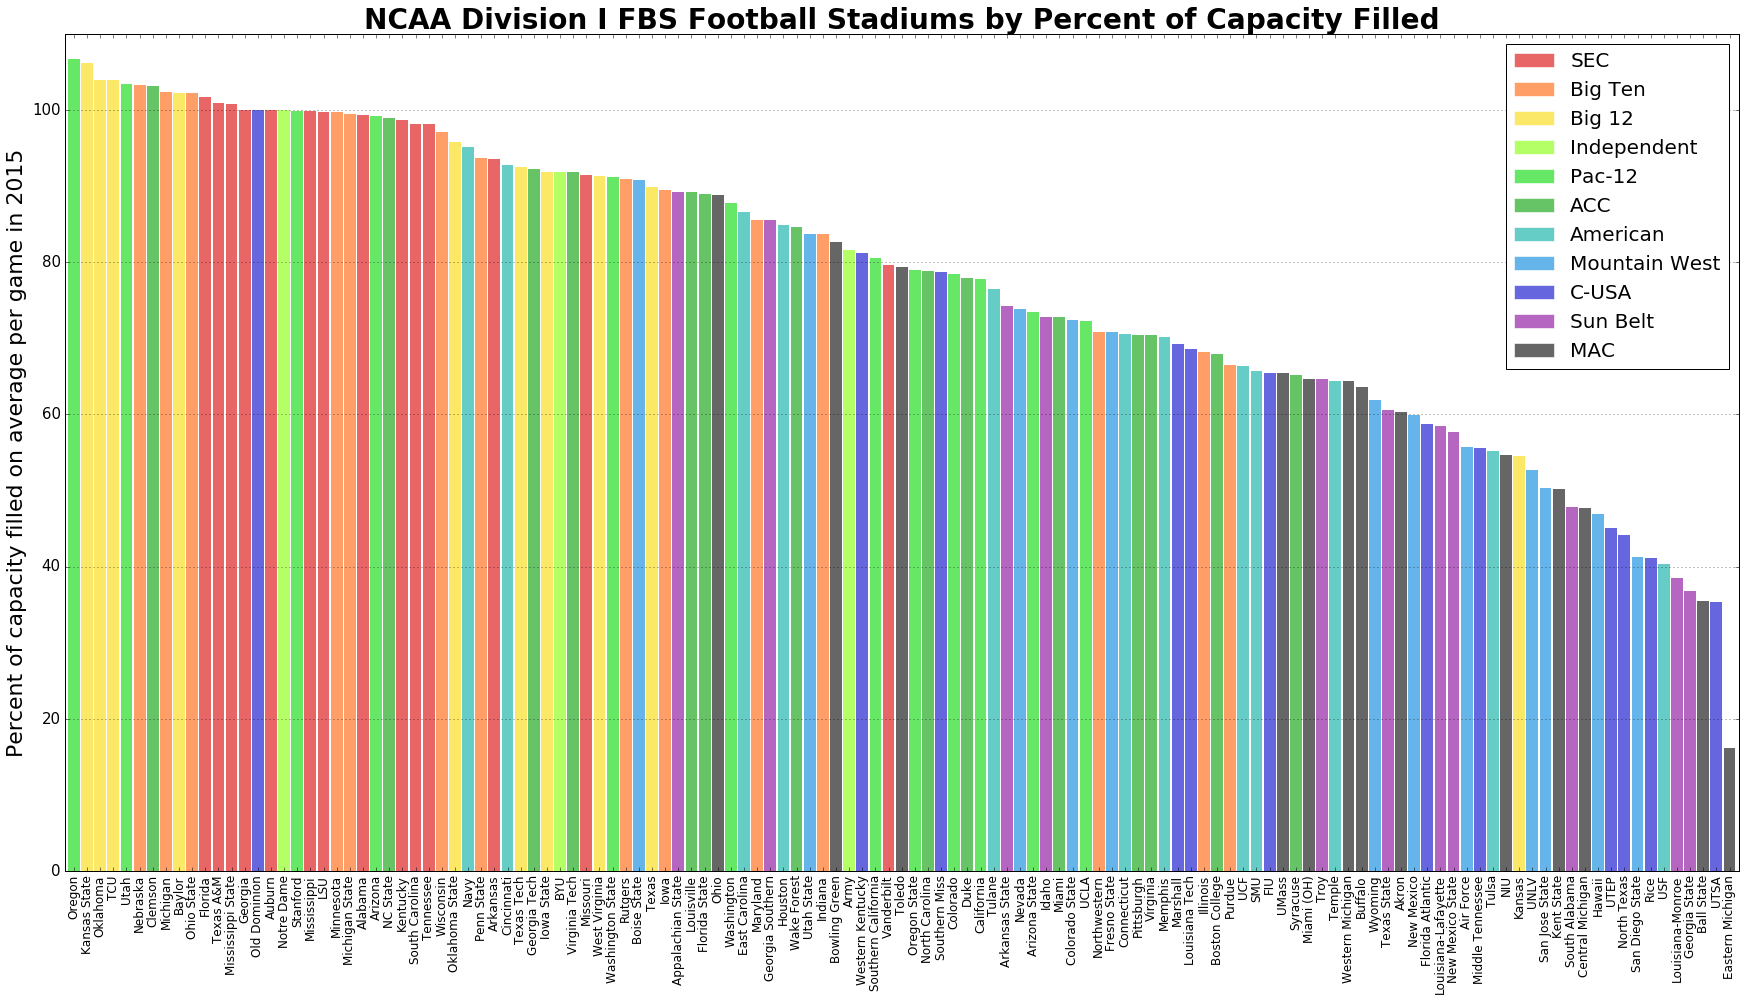

In [18]:
# visualize stadiums by percent of capacity filled per game on average
ax = (df_plot['pct_fill']*100).plot(kind='bar', figsize=[30, 15], width=0.9, alpha=0.6, color=colors, linewidth=0)
ax.yaxis.grid(True)
ax.set_ylim([0, 110])
for label in ax.get_xticklabels():
    label.set_fontproperties(xticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(yticks_font)
ax.set_ylabel('Percent of capacity filled on average per game in 2015', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('NCAA Division I FBS Football Stadiums by Percent of Capacity Filled', 
             fontproperties=title_font, y=1)

legend_patches = []
for conf in confs_by_capacity.index:
    patch = mpatches.Patch(fc=conf_colors[conf], alpha=0.6, ec='w', label=conf)
    legend_patches.append(patch)
legend_patches.reverse()
ax.legend(handles=legend_patches, loc=1, prop={'size':legend_size})

plt.savefig('images/stadiums-fbs-fill-conf-bar.png', dpi=96, bbox_inches='tight', pad_inches=0.3)
plt.show()

In [19]:
# set the font properties for the small chart
title_font_sm = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=16, weight='bold', stretch='normal')
label_font_sm = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=14, weight='normal', stretch='normal')
ticks_font_sm = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
legend_size = 20

In [20]:
df_conf = df_plot.groupby('conference')['per_game_attend'].mean()
df_conf = df_conf.sort_values(ascending=False)
df_conf = df_conf / 1000
df_conf

conference
SEC              78.896000
Big Ten          65.998214
Big 12           57.405400
Independent      56.772667
Pac-12           51.333000
ACC              48.492286
American         31.925917
Mountain West    23.824417
C-USA            20.259167
Sun Belt         17.424000
MAC              15.357385
Name: per_game_attend, dtype: float64

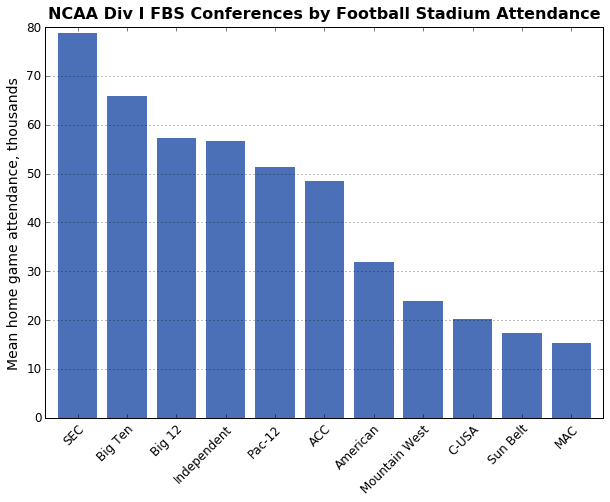

In [21]:
divs = [df_plot[df_plot['conference']==label].iloc[0]['div'] for label in df_conf.index]

ax = df_conf.plot(kind='bar', figsize=[10, 7], color='#003399', width=0.8, alpha=0.7, linewidth=0)
ax.yaxis.grid(True)
ax.set_xticklabels(df_conf.index, rotation=45, rotation_mode='anchor', ha='right', fontproperties=ticks_font_sm)
for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font_sm)
ax.set_xlabel('', fontproperties=label_font_sm)
ax.set_ylabel('Mean home game attendance, thousands', fontproperties=label_font_sm)
ax.set_title('NCAA Div I FBS Conferences by Football Stadium Attendance', fontproperties=title_font_sm, y=1.01)

plt.savefig('images/conferences-fbs-attendance-bar.png', dpi=96, bbox_inches='tight', pad_inches=0.1)
plt.show()

In [22]:
# re-sort by per game avg attendance and get a color list
df_plot = df_plot.sort_values(by='per_game_attend', ascending=False)
colors = df_plot['conference'].map(lambda x: conf_colors[x])

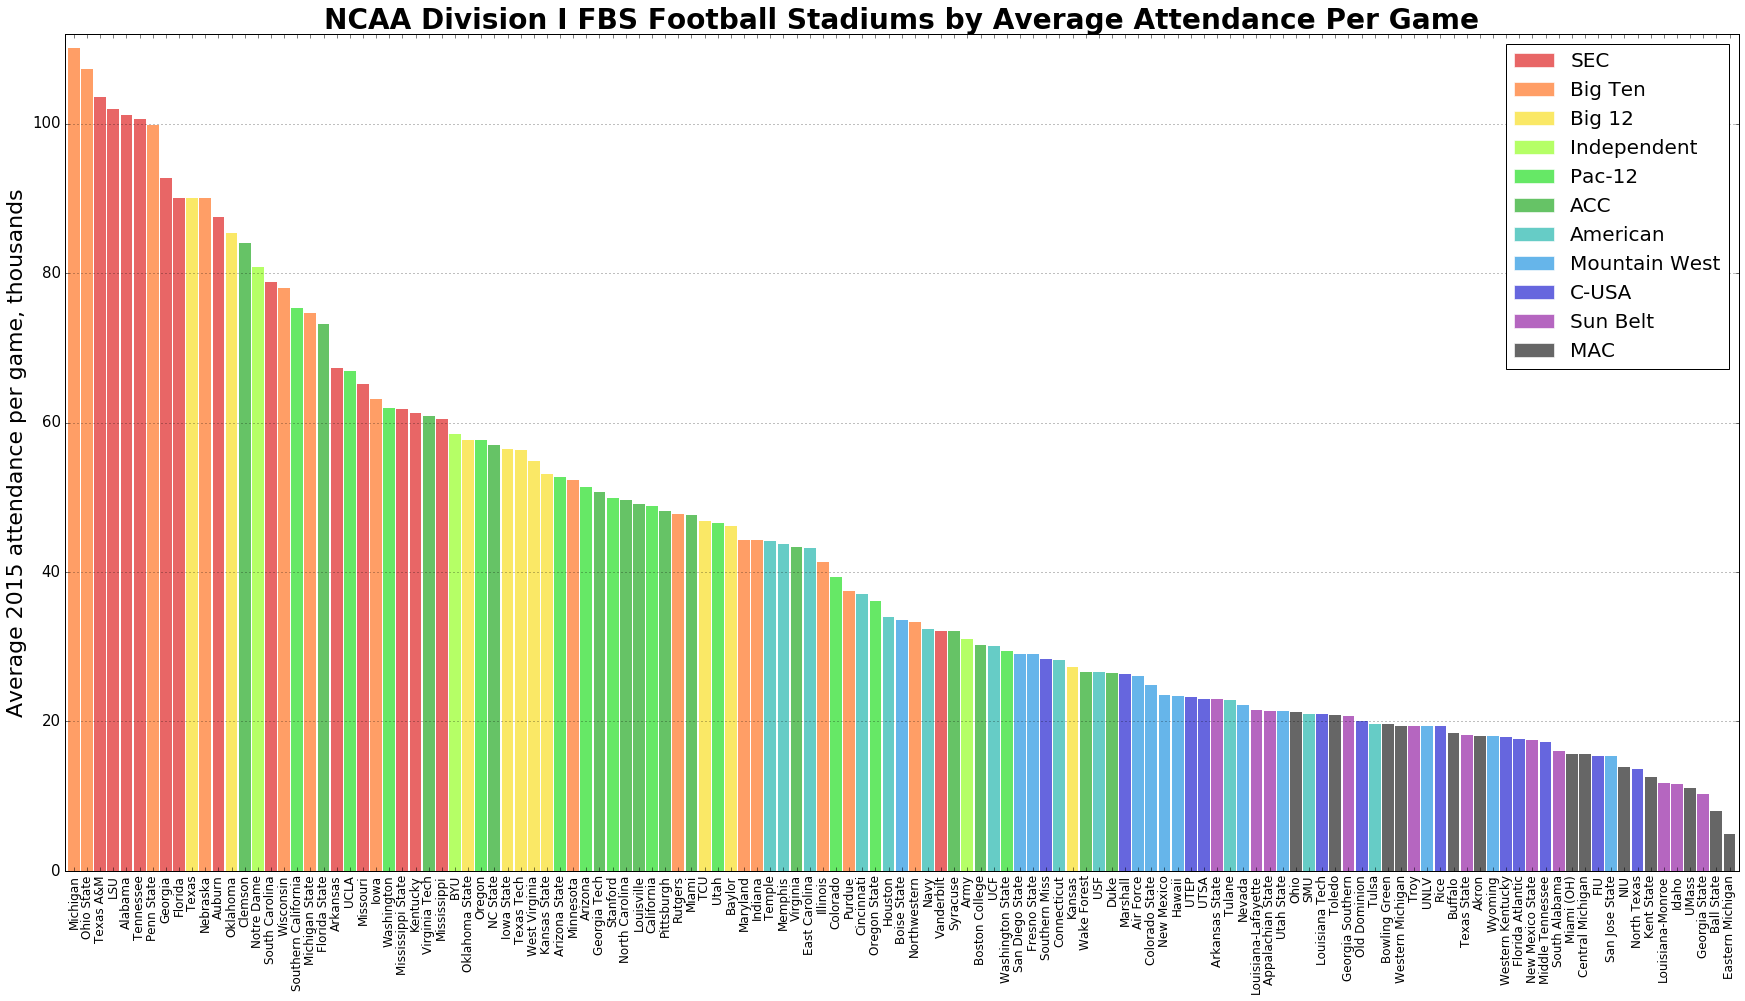

In [23]:
# visualize stadiums by per game average attendance
ax = (df_plot['per_game_attend']/1000.).plot(kind='bar', figsize=[30, 15], width=0.9, alpha=0.6, color=colors, linewidth=0)
ax.yaxis.grid(True)
ax.set_ylim([0,112])
for label in ax.get_xticklabels():
    label.set_fontproperties(xticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(yticks_font)
ax.set_ylabel('Average 2015 attendance per game, thousands', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('NCAA Division I FBS Football Stadiums by Average Attendance Per Game', fontproperties=title_font, y=1)

legend_patches = []
for conf in confs_by_capacity.index:
    patch = mpatches.Patch(fc=conf_colors[conf], alpha=0.6, ec='w', label=conf)
    legend_patches.append(patch)
legend_patches.reverse()
ax.legend(handles=legend_patches, loc=1, prop={'size':legend_size})

plt.savefig('images/stadiums-fbs-attend-conf-bar.png', dpi=96, bbox_inches='tight', pad_inches=0.3)
plt.show()

In [24]:
# sort by capacity or attendance, whichever is higher, to make stacked bars decline in height order
index = df_plot.apply(lambda row: max(row['capacity'], row['per_game_attend']), axis=1).sort_values(ascending=False).index
df_plot = df_plot.reindex(index)
colors = df_plot['conference'].map(lambda x: conf_colors[x])

# make a df containing just per-game attendance and excess capacity, for stacked-bar charting
attend = df_plot['per_game_attend']/1000.
capacity = df_plot['capacity']/1000.
difference = capacity - attend
data = pd.DataFrame({'attend':attend, 'difference':difference})
data['difference'] = data['difference'].map(lambda x: x if x > 0 else 0)

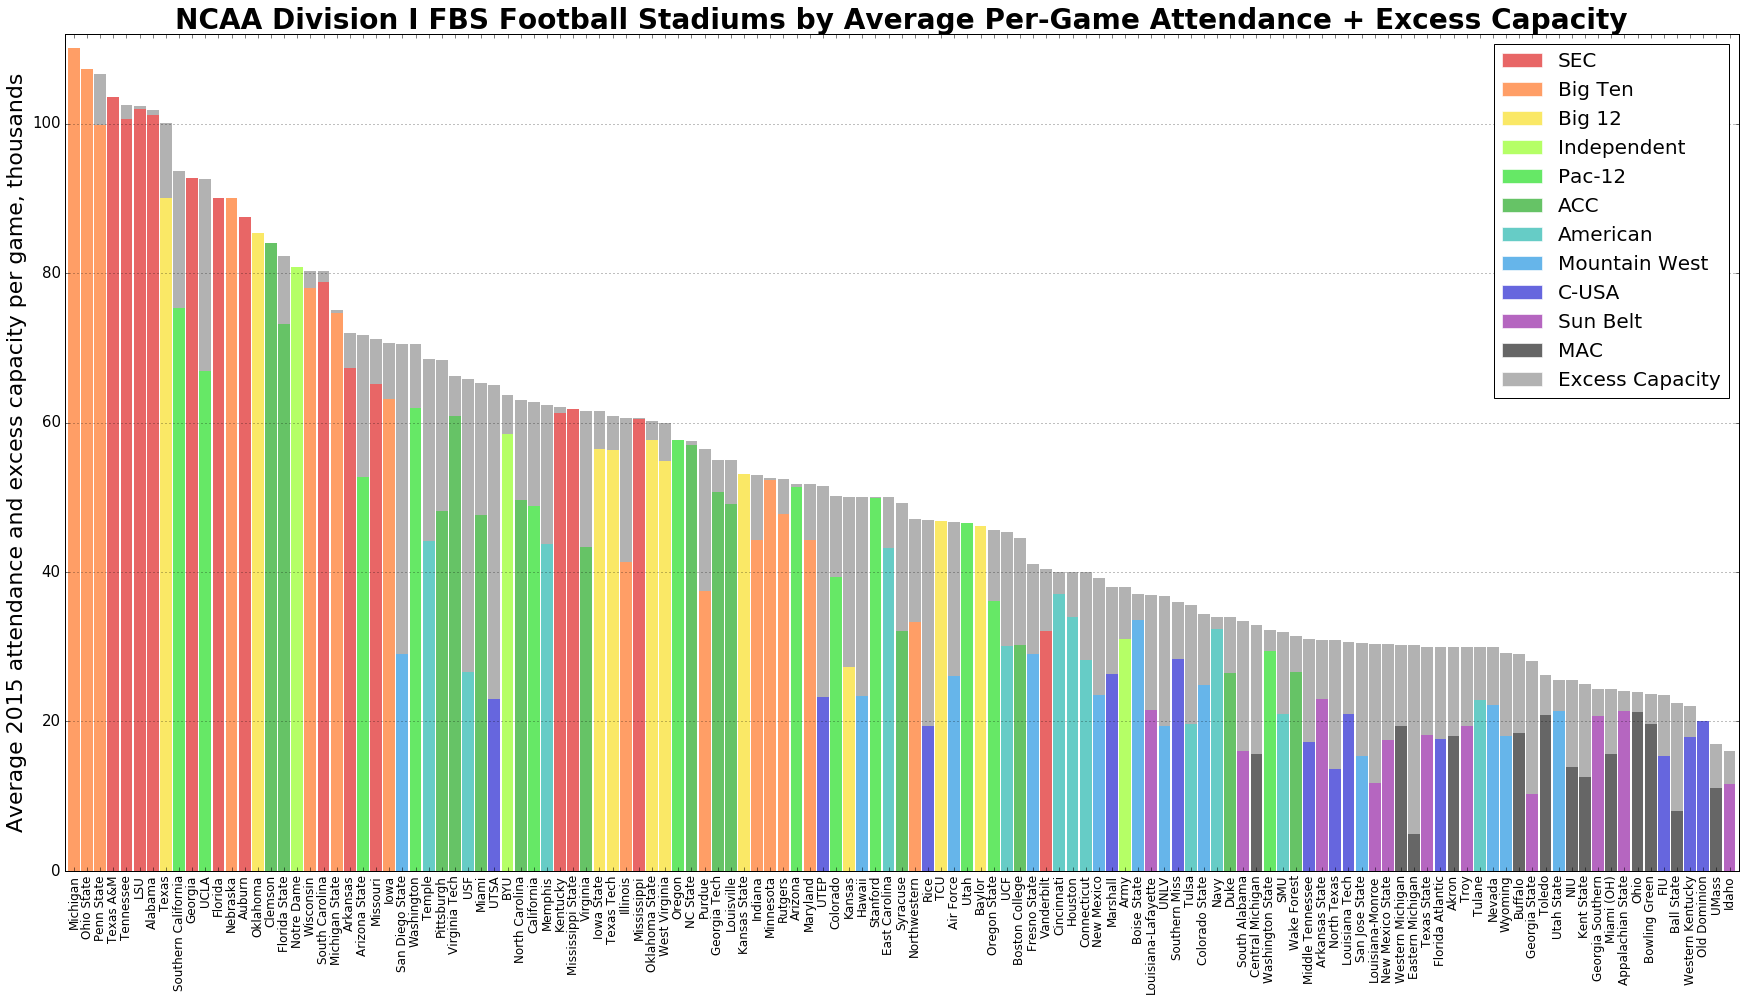

In [25]:
# visualize stadiums by per-game attendance and excess capacity
ax = data.plot(kind='bar', figsize=[30, 15], width=0.9, alpha=0.6, color=[colors, 'gray'], linewidth=0, stacked=True)
ax.yaxis.grid(True)
ax.set_ylim([0,112])
for label in ax.get_xticklabels():
    label.set_fontproperties(xticks_font)
for label in ax.get_yticklabels():
    label.set_fontproperties(yticks_font)
ax.set_ylabel('Average 2015 attendance and excess capacity per game, thousands', fontproperties=label_font)
ax.set_xlabel('', fontproperties=label_font)
ax.set_title('NCAA Division I FBS Football Stadiums by Average Per-Game Attendance + Excess Capacity', 
             fontproperties=title_font, y=1)

legend_patches = []
for conf in confs_by_capacity.index:
    patch = mpatches.Patch(fc=conf_colors[conf], alpha=0.6, ec='w', label=conf)
    legend_patches.append(patch)
legend_patches.reverse()
patch = mpatches.Patch(fc='gray', alpha=0.6, ec='w', label='Excess Capacity')
legend_patches.append(patch)
ax.legend(handles=legend_patches, loc=1, prop={'size':legend_size})

plt.savefig('images/stadiums-fbs-attend-capacity-conf-bar.png', dpi=96, bbox_inches='tight', pad_inches=0.3)
plt.show()